/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_4878/3505198628.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['open'].fillna(method='ffill', inplace=True)
/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_4878/3505198628.py:45: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['open'].fillna(method='ffill', inplace=True)
/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_4878/3505198628.py:46: FutureWar

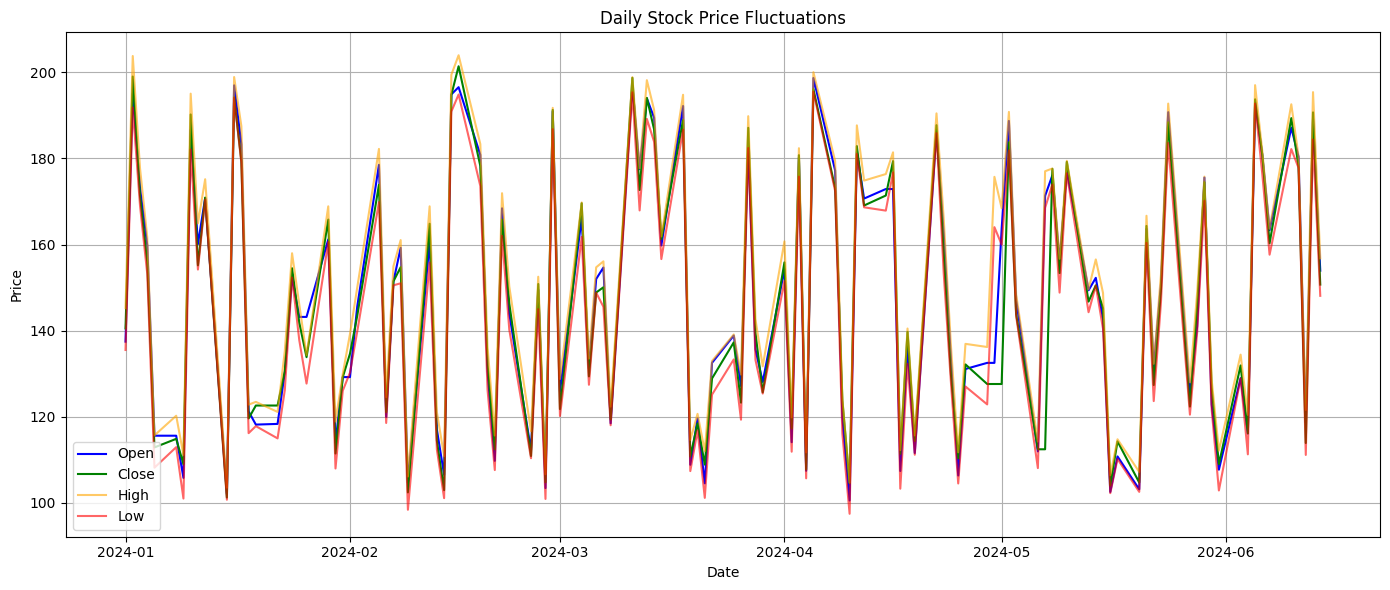

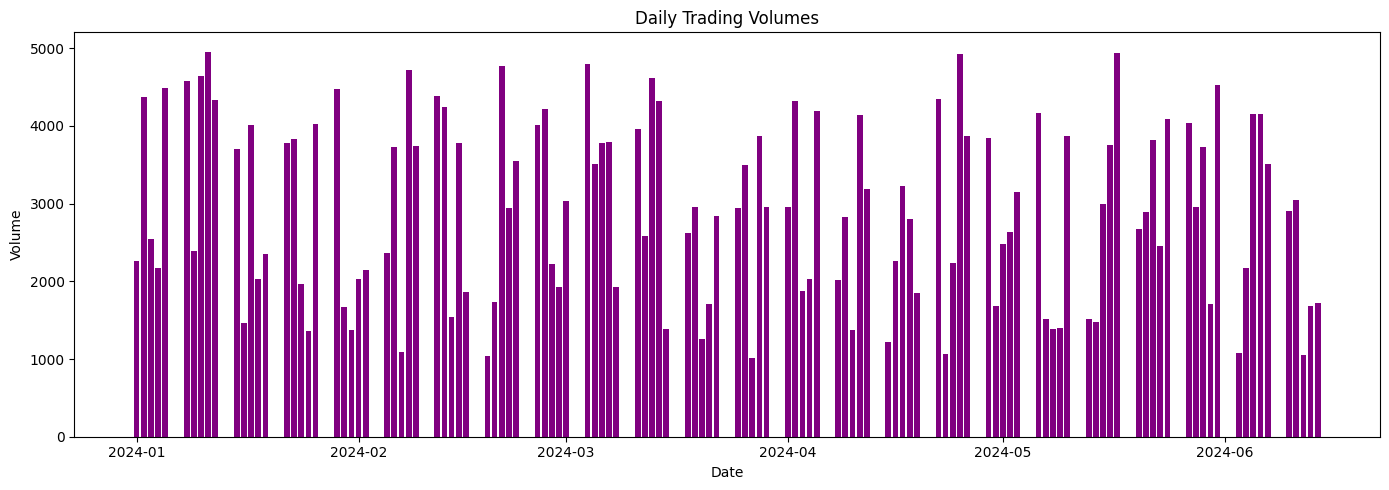

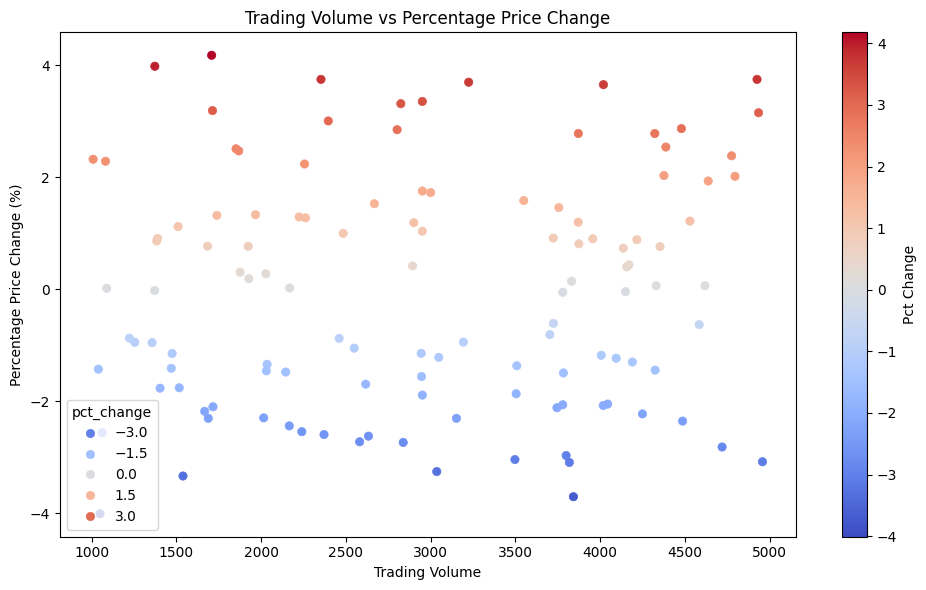

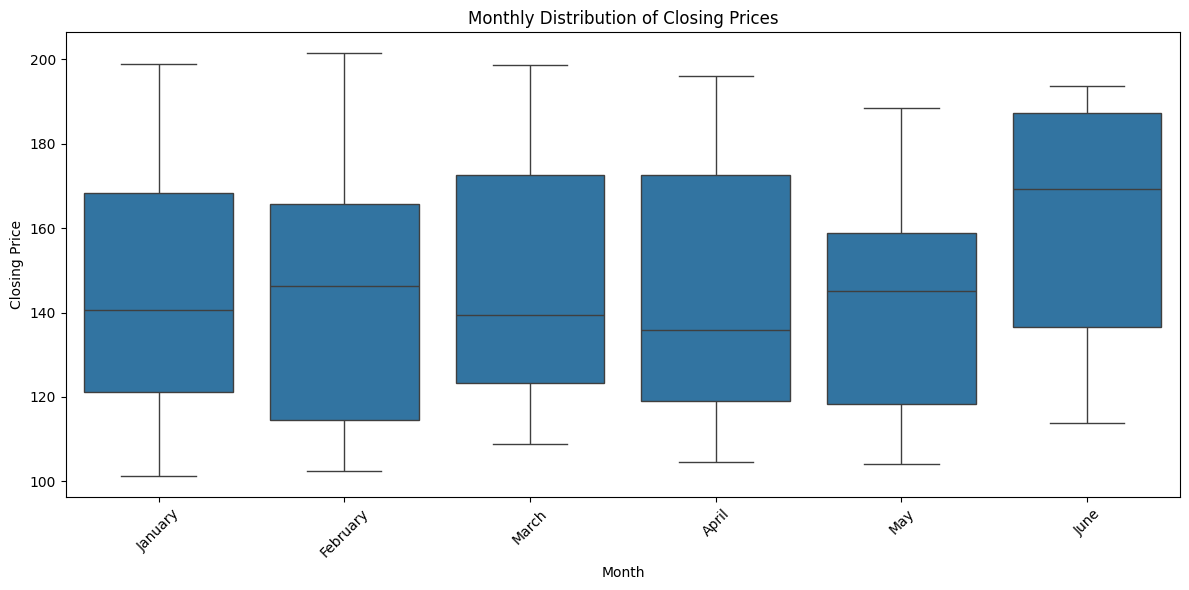

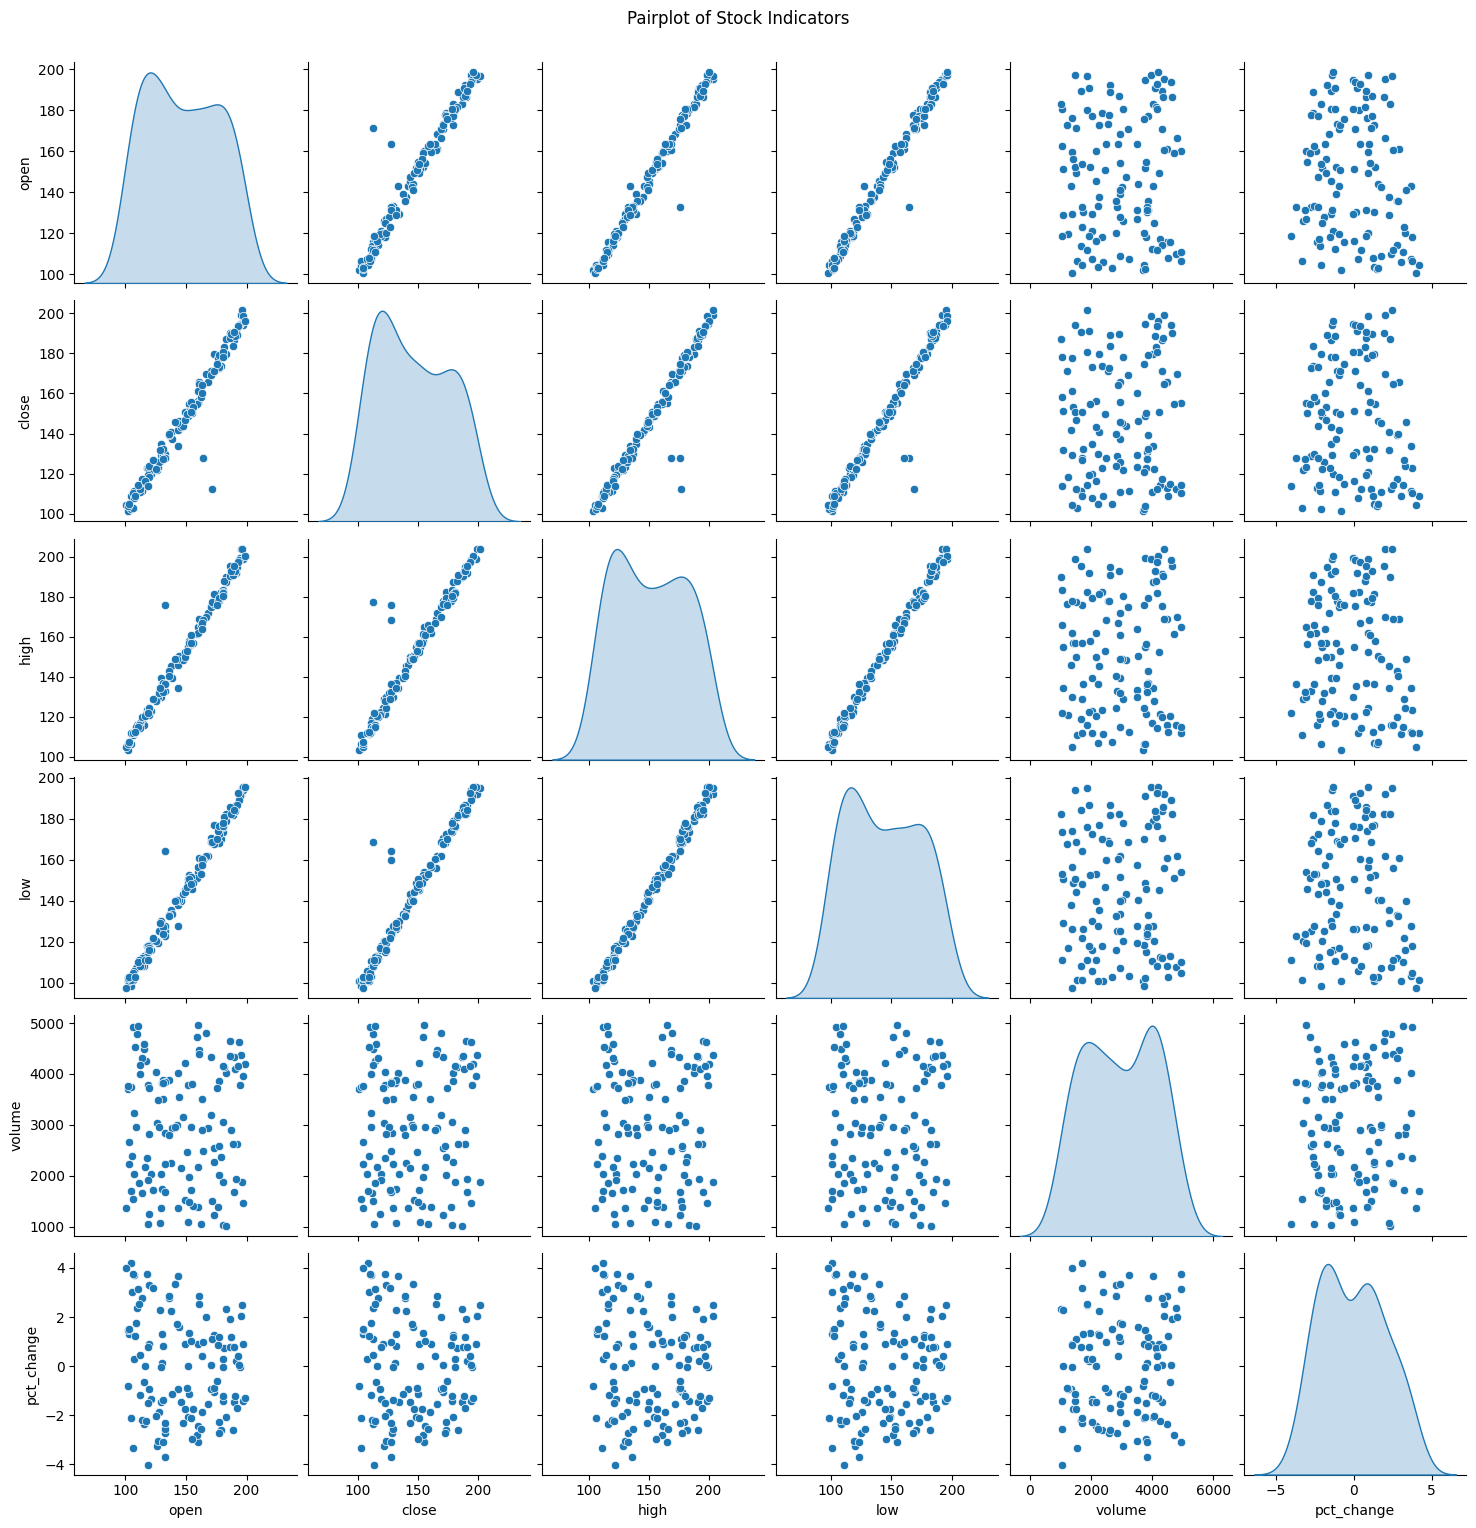

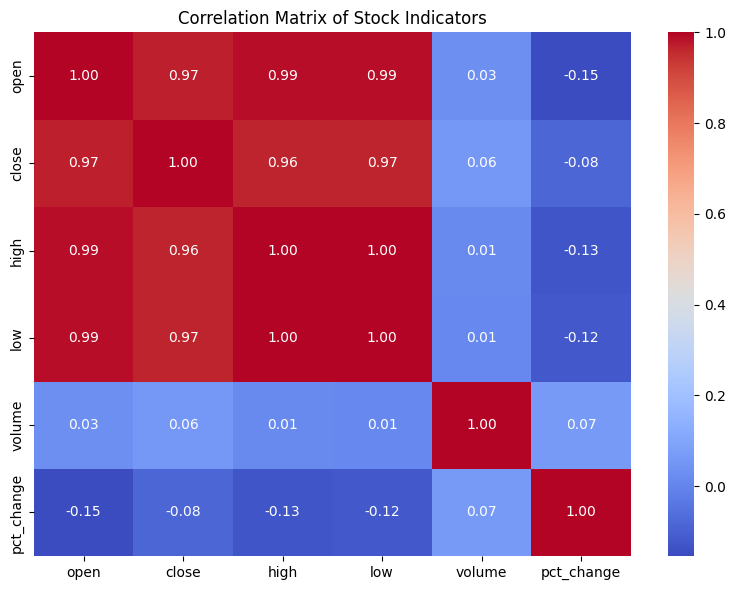

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

output_dir = 'stock_plots'
os.makedirs(output_dir, exist_ok=True)



dates = pd.date_range(start='2024-01-01', periods=120, freq='B')  # Business days

np.random.seed(42)
open_prices = np.random.uniform(100, 200, len(dates))
close_prices = open_prices + np.random.uniform(-5, 5, len(dates))
high_prices = np.maximum(open_prices, close_prices) + np.random.uniform(0, 5, len(dates))
low_prices = np.minimum(open_prices, close_prices) - np.random.uniform(0, 5, len(dates))
volume = np.random.randint(1000, 5000, len(dates))
pct_change = (close_prices - open_prices) / open_prices * 100

data = {
    'date': dates,
    'open': open_prices,
    'close': close_prices,
    'high': high_prices,
    'low': low_prices,
    'volume': volume,
    'pct_change': pct_change
}

df = pd.DataFrame(data)

for col in ['open', 'close', 'volume']:
    df.loc[df.sample(frac=0.03).index, col] = np.nan



df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

df['open'].fillna(method='ffill', inplace=True)
df['close'].fillna(method='ffill', inplace=True)
df['volume'].fillna(df['volume'].mean(), inplace=True)

df['month'] = df['date'].dt.month_name()

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['open'], label='Open', color='blue')
plt.plot(df['date'], df['close'], label='Close', color='green')
plt.plot(df['date'], df['high'], label='High', color='orange', alpha=0.6)
plt.plot(df['date'], df['low'], label='Low', color='red', alpha=0.6)
plt.title('Daily Stock Price Fluctuations')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{output_dir}/daily_stock_prices.jpeg")
plt.show()


plt.figure(figsize=(14, 5))
plt.bar(df['date'], df['volume'], color='purple')
plt.title('Daily Trading Volumes')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.tight_layout()
plt.savefig(f"{output_dir}/daily_trading_volume.jpeg")
plt.show()



plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='volume', y='pct_change', hue='pct_change', palette='coolwarm', edgecolor=None)
plt.title('Trading Volume vs Percentage Price Change')
plt.xlabel('Trading Volume')
plt.ylabel('Percentage Price Change (%)')


norm = plt.Normalize(df['pct_change'].min(), df['pct_change'].max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

plt.colorbar(sm, ax=ax, label='Pct Change')  

plt.tight_layout()
plt.savefig(f"{output_dir}/volume_vs_pct_change.jpeg")
plt.show()

plt.figure(figsize=(12, 6))
order = df['month'].unique() 
sns.boxplot(data=df, x='month', y='close', order=order)
plt.title('Monthly Distribution of Closing Prices')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{output_dir}/monthly_close_price_boxplot.jpeg")
plt.show()


sns.pairplot(df[['open', 'close', 'high', 'low', 'volume', 'pct_change']], diag_kind='kde')
plt.suptitle('Pairplot of Stock Indicators', y=1.02)
plt.savefig(f"{output_dir}/pairplot_stock_indicators.jpeg")
plt.show()


plt.figure(figsize=(8, 6))
corr = df[['open', 'close', 'high', 'low', 'volume', 'pct_change']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Indicators')
plt.tight_layout()
plt.savefig(f"{output_dir}/correlation_heatmap.jpeg")
plt.show()
